# Quality Predictions in a Mining Process - Machine Learning

## Proyecto

### Librerías

In [145]:
# Análisis de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

## Data Analysis (EDA)

### Limpieza de BBDD y tipos de datos

In [146]:
df = pd.read_csv('MiningProcess.csv')
df.head()

,date,porcentaje_iron_feed,porcentaje_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,...,flotation_column_06_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,porcentaje_iron_concentrate,porcentaje_silica_concentrate
0,42804.04167,"55,2","16,98","3019,53",557434,395713,100664,"1,74",249214,253235,...,250884,457396,432962,424954,443558,502255,"446,37",523344,"66,91","1,31"
1,42804.04167,"55,2","16,98","3024,41",563965,397383,100672,"1,74",249719,250532,...,248994,451891,"429,56",432939,448086,496363,445922,498075,"66,91","1,31"
2,42804.04167,"55,2","16,98","3043,46",568054,399668,10068,"1,74",249741,247874,...,248071,"451,24",468927,"434,61",449688,484411,447826,458567,"66,91","1,31"
3,42804.04167,"55,2","16,98","3047,36",568665,397939,100689,"1,74",249917,254487,...,251147,452441,458165,442865,"446,21",471411,"437,69",427669,"66,91","1,31"
4,42804.04167,"55,2","16,98","3033,69",558167,400254,100697,"1,74",250203,252136,...,248928,452441,"452,9",450523,"453,67",462598,443682,425679,"66,91","1,31"


In [147]:
df.shape

(737453, 23)

In [148]:
df.isna().sum()

date                             0
porcentaje_iron_feed             0
porcentaje_silica_feed           0
starch_flow                      0
amina_flow                       0
ore_pulp_flow                    0
ore_pulp_pH                      0
ore_pulp_density                 0
flotation_column_01_air_flow     0
flotation_column_02_air_flow     0
flotation_column_03_air_flow     0
flotation_column_04_air_flow     0
flotation_column_05_air_flow     0
flotation_column_06_air_flow     0
flotation_column_01_level        0
flotation_column_02_level        0
flotation_column_03_level        0
flotation_column_04_level        0
flotation_column_05_level        0
flotation_column_06_level        0
flotation_column_07_level        0
porcentaje_iron_concentrate      0
porcentaje_silica_concentrate    0
dtype: int64

In [149]:
df.dtypes

date                             float64
porcentaje_iron_feed              object
porcentaje_silica_feed            object
starch_flow                       object
amina_flow                        object
ore_pulp_flow                     object
ore_pulp_pH                       object
ore_pulp_density                  object
flotation_column_01_air_flow      object
flotation_column_02_air_flow      object
flotation_column_03_air_flow      object
flotation_column_04_air_flow      object
flotation_column_05_air_flow      object
flotation_column_06_air_flow      object
flotation_column_01_level         object
flotation_column_02_level         object
flotation_column_03_level         object
flotation_column_04_level         object
flotation_column_05_level         object
flotation_column_06_level         object
flotation_column_07_level         object
porcentaje_iron_concentrate       object
porcentaje_silica_concentrate     object
dtype: object

In [150]:
df['porcentaje_iron_feed'] = df['porcentaje_iron_feed'].str.replace(",",".")
df['porcentaje_iron_feed']

0          55.2
1          55.2
2          55.2
3          55.2
4          55.2
          ...  
737448    49.75
737449    49.75
737450    49.75
737451    49.75
737452    49.75
Name: porcentaje_iron_feed, Length: 737453, dtype: object

In [151]:
df['porcentaje_silica_feed'] = df['porcentaje_silica_feed'].str.replace(",",".")
df['porcentaje_silica_feed']

0         16.98
1         16.98
2         16.98
3         16.98
4         16.98
          ...  
737448     23.2
737449     23.2
737450     23.2
737451     23.2
737452     23.2
Name: porcentaje_silica_feed, Length: 737453, dtype: object

In [152]:
df['starch_flow'] = df['starch_flow'].str.replace(",",".")
df['starch_flow']

0         3019.53
1         3024.41
2         3043.46
3         3047.36
4         3033.69
           ...   
737448    2710.94
737449    2692.01
737450     2692.2
737451    1164.12
737452    1164.12
Name: starch_flow, Length: 737453, dtype: object

In [153]:
df['amina_flow'] = df['amina_flow'].str.replace(",",".")
df['amina_flow']

0         557434
1         563965
2         568054
3         568665
4         558167
           ...  
737448    441052
737449    473436
737450    500488
737451    491548
737452    468019
Name: amina_flow, Length: 737453, dtype: object

In [154]:
df['ore_pulp_flow'] = df['ore_pulp_flow'].str.replace(",",".")
df['ore_pulp_flow']

0         395713
1         397383
2         399668
3         397939
4         400254
           ...  
737448    386.57
737449    384939
737450    383496
737451    384976
737452    384801
Name: ore_pulp_flow, Length: 737453, dtype: object

In [155]:
df['ore_pulp_pH'] = df['ore_pulp_pH'].str.replace(",",".")
df['ore_pulp_pH']

0         100664
1         100672
2          10068
3         100689
4         100697
           ...  
737448    962129
737449    962063
737450    961874
737451    961686
737452    961497
Name: ore_pulp_pH, Length: 737453, dtype: object

In [156]:
df['ore_pulp_density'] = df['ore_pulp_density'].str.replace(",",".")
df['ore_pulp_density']

0           1.74
1           1.74
2           1.74
3           1.74
4           1.74
           ...  
737448    165365
737449    165352
737450    165338
737451    165324
737452     16531
Name: ore_pulp_density, Length: 737453, dtype: object

In [157]:
df['flotation_column_01_air_flow'] = df['flotation_column_01_air_flow'].str.replace(",",".")
df['flotation_column_01_air_flow']

0         249214
1         249719
2         249741
3         249917
4         250203
           ...  
737448    302344
737449    303013
737450    303662
737451    302.55
737452    300355
Name: flotation_column_01_air_flow, Length: 737453, dtype: object

In [158]:
df['flotation_column_02_air_flow'] = df['flotation_column_02_air_flow'].str.replace(",",".")
df['flotation_column_02_air_flow']

0         253235
1         250532
2         247874
3         254487
4         252136
           ...  
737448    298786
737449    301879
737450    307397
737451    301959
737452    292865
Name: flotation_column_02_air_flow, Length: 737453, dtype: object

In [159]:
df['flotation_column_03_air_flow'] = df['flotation_column_03_air_flow'].str.replace(",",".")
df['flotation_column_03_air_flow']

0         250576
1         250862
2         250313
3         250049
4         249895
           ...  
737448    299163
737449    299487
737450    299487
737451    298045
737452    298625
Name: flotation_column_03_air_flow, Length: 737453, dtype: object

In [160]:
df['flotation_column_04_air_flow'] = df['flotation_column_04_air_flow'].str.replace(",",".")
df['flotation_column_04_air_flow']

0          306.4
1          306.4
2          306.4
3          306.4
4          306.4
           ...  
737448    299623
737449    300465
737450    299707
737451    298819
737452    297395
Name: flotation_column_04_air_flow, Length: 737453, dtype: object

In [161]:
df['flotation_column_05_air_flow'] = df['flotation_column_05_air_flow'].str.replace(",",".")
df['flotation_column_05_air_flow']

0         250225
1         250137
2         251345
3         250422
4         249983
           ...  
737448    346794
737449    330023
737450    329.59
737451    351453
737452    362464
Name: flotation_column_05_air_flow, Length: 737453, dtype: object

In [162]:
df['flotation_column_06_air_flow'] = df['flotation_column_06_air_flow'].str.replace(",",".")
df['flotation_column_06_air_flow']

0         250884
1         248994
2         248071
3         251147
4         248928
           ...  
737448    313695
737449     236.7
737450    225879
737451    308115
737452    308115
Name: flotation_column_06_air_flow, Length: 737453, dtype: object

In [163]:
df['flotation_column_01_level'] = df['flotation_column_01_level'].str.replace(",",".")
df['flotation_column_01_level']

0         457396
1         451891
2         451.24
3         452441
4         452441
           ...  
737448    392.16
737449    401505
737450    408899
737451    405107
737452    413754
Name: flotation_column_01_level, Length: 737453, dtype: object

In [164]:
df['flotation_column_02_level'] = df['flotation_column_02_level'].str.replace(",",".")
df['flotation_column_02_level']

0         432962
1         429.56
2         468927
3         458165
4          452.9
           ...  
737448    430702
737449    404616
737450    399316
737451    466832
737452    514143
Name: flotation_column_02_level, Length: 737453, dtype: object

In [165]:
df['flotation_column_03_level'] = df['flotation_column_03_level'].str.replace(",",".")
df['flotation_column_03_level']

0         424954
1         432939
2         434.61
3         442865
4         450523
           ...  
737448    872008
737449    864409
737450    867598
737451    876591
737452    881323
Name: flotation_column_03_level, Length: 737453, dtype: object

In [166]:
df['flotation_column_04_level'] = df['flotation_column_04_level'].str.replace(",",".")
df['flotation_column_04_level']

0         443558
1         448086
2         449688
3         446.21
4         453.67
           ...  
737448    418725
737449    418377
737450    419531
737451    407299
737452    378969
Name: flotation_column_04_level, Length: 737453, dtype: object

In [167]:
df['flotation_column_05_level'] = df['flotation_column_05_level'].str.replace(",",".")
df['flotation_column_05_level']

0         502255
1         496363
2         484411
3         471411
4         462598
           ...  
737448    497548
737449    506398
737450    503414
737451    502301
737452     500.1
Name: flotation_column_05_level, Length: 737453, dtype: object

In [168]:
df['flotation_column_06_level'] = df['flotation_column_06_level'].str.replace(",",".")
df['flotation_column_06_level']

0         446.37
1         445922
2         447826
3         437.69
4         443682
           ...  
737448    446357
737449    372995
737450    336035
737451    340844
737452    374354
Name: flotation_column_06_level, Length: 737453, dtype: object

In [169]:
df['flotation_column_07_level'] = df['flotation_column_07_level'].str.replace(",",".")
df['flotation_column_07_level']

0         523344
1         498075
2         458567
3         427669
4         425679
           ...  
737448    416892
737449    426337
737450    433.13
737451    433966
737452    441182
Name: flotation_column_07_level, Length: 737453, dtype: object

In [170]:
df['porcentaje_iron_concentrate'] = df['porcentaje_iron_concentrate'].str.replace(",",".")
df['porcentaje_iron_concentrate']

0         66.91
1         66.91
2         66.91
3         66.91
4         66.91
          ...  
737448    64.27
737449    64.27
737450    64.27
737451    64.27
737452    64.27
Name: porcentaje_iron_concentrate, Length: 737453, dtype: object

In [171]:
df['porcentaje_silica_concentrate'] = df['porcentaje_silica_concentrate'].str.replace(",",".")
df['porcentaje_silica_concentrate']

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
737448    1.71
737449    1.71
737450    1.71
737451    1.71
737452    1.71
Name: porcentaje_silica_concentrate, Length: 737453, dtype: object

In [172]:
diccionario_de_conversion = {
    'date': 'datetime64[ns]',
    'porcentaje_iron_feed': 'float',
    'porcentaje_silica_feed': 'float',          
    'starch_flow': 'float',                    
    'amina_flow': 'float',                       
    'ore_pulp_flow': 'float',                   
    'ore_pulp_pH': 'float',                     
    'ore_pulp_density': 'float',                
    'flotation_column_01_air_flow': 'float',   
    'flotation_column_02_air_flow': 'float',    
    'flotation_column_03_air_flow': 'float',    
    'flotation_column_04_air_flow': 'float',    
    'flotation_column_05_air_flow': 'float',  
    'flotation_column_06_air_flow': 'float',   
    'flotation_column_01_level': 'float',       
    'flotation_column_02_level': 'float',     
    'flotation_column_03_level': 'float',      
    'flotation_column_04_level': 'float',       
    'flotation_column_05_level': 'float',      
    'flotation_column_06_level': 'float',      
    'flotation_column_07_level': 'float',       
    'porcentaje_iron_concentrate': 'float',    
    'porcentaje_silica_concentrate': 'float'   
}

In [173]:
df_nuevo = df.astype(diccionario_de_conversion)
df_nuevo.head()

,date,porcentaje_iron_feed,porcentaje_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,...,flotation_column_06_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,porcentaje_iron_concentrate,porcentaje_silica_concentrate
0,1970-01-01 00:00:00.000042804,55.2,16.98,3019.53,557434.0,395713.0,100664.0,1.74,249214.0,253235.0,...,250884.0,457396.00,432962.00,424954.00,443558.00,502255.0,446.37,523344.0,66.91,1.31
1,1970-01-01 00:00:00.000042804,55.2,16.98,3024.41,563965.0,397383.0,100672.0,1.74,249719.0,250532.0,...,248994.0,451891.00,429.56,432939.00,448086.00,496363.0,445922.00,498075.0,66.91,1.31
2,1970-01-01 00:00:00.000042804,55.2,16.98,3043.46,568054.0,399668.0,10068.0,1.74,249741.0,247874.0,...,248071.0,451.24,468927.00,434.61,449688.00,484411.0,447826.00,458567.0,66.91,1.31
3,1970-01-01 00:00:00.000042804,55.2,16.98,3047.36,568665.0,397939.0,100689.0,1.74,249917.0,254487.0,...,251147.0,452441.00,458165.00,442865.00,446.21,471411.0,437.69,427669.0,66.91,1.31
4,1970-01-01 00:00:00.000042804,55.2,16.98,3033.69,558167.0,400254.0,100697.0,1.74,250203.0,252136.0,...,248928.0,452441.00,452.90,450523.00,453.67,462598.0,443682.00,425679.0,66.91,1.31


In [174]:
df_nuevo.dtypes

date                             datetime64[ns]
porcentaje_iron_feed                    float64
porcentaje_silica_feed                  float64
starch_flow                             float64
amina_flow                              float64
ore_pulp_flow                           float64
ore_pulp_pH                             float64
ore_pulp_density                        float64
flotation_column_01_air_flow            float64
flotation_column_02_air_flow            float64
flotation_column_03_air_flow            float64
flotation_column_04_air_flow            float64
flotation_column_05_air_flow            float64
flotation_column_06_air_flow            float64
flotation_column_01_level               float64
flotation_column_02_level               float64
flotation_column_03_level               float64
flotation_column_04_level               float64
flotation_column_05_level               float64
flotation_column_06_level               float64
flotation_column_07_level               

### Análisis exploratorio

#### Medidas de tendencia central

In [175]:
# Porcentaje de Iron Feed
print(f"La media es: {round(df_nuevo['porcentaje_iron_feed'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['porcentaje_iron_feed'].median()}")
print(f"La moda es: {df_nuevo['porcentaje_iron_feed'].mode()}")

La media es: 56.29
La mediana es: 56.08
La moda es: 0    64.03
dtype: float64


In [176]:
# Porcentaje de Silica Feed
print(f"La media es: {round(df_nuevo['porcentaje_silica_feed'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['porcentaje_silica_feed'].median()}")
print(f"La moda es: {df_nuevo['porcentaje_silica_feed'].mode()}")

La media es: 14.65
La mediana es: 13.85
La moda es: 0    6.26
dtype: float64


In [177]:
# Starch Flow
print(f"La media es: {round(df_nuevo['starch_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['starch_flow'].median()}")
print(f"La moda es: {df_nuevo['starch_flow'].mode()}")

La media es: 1339411786919.71
La mediana es: 3518.82
La moda es: 0    2562.5
dtype: float64


In [178]:
# Amina Flow
print(f"La media es: {round(df_nuevo['amina_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['amina_flow'].median()}")
print(f"La moda es: {df_nuevo['amina_flow'].mode()}")

La media es: 216132543670.13
La mediana es: 509033.0
La moda es: 0    2.440000e+12
dtype: float64


In [179]:
# Ore Pulp Flow
print(f"La media es: {round(df_nuevo['ore_pulp_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['ore_pulp_flow'].median()}")
print(f"La moda es: {df_nuevo['ore_pulp_flow'].mode()}")

La media es: 624544167058.06
La mediana es: 400246.0
La moda es: 0    3.790000e+12
dtype: float64


In [180]:
# Ore Pulp pH
print(f"La media es: {round(df_nuevo['ore_pulp_pH'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['ore_pulp_pH'].median()}")
print(f"La moda es: {df_nuevo['ore_pulp_pH'].mode()}")

La media es: 1909160708.7
La mediana es: 943335.0
La moda es: 0    100591.0
dtype: float64


In [181]:
# Ore Pulp Density
print(f"La media es: {round(df_nuevo['ore_pulp_density'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['ore_pulp_density'].median()}")
print(f"La moda es: {df_nuevo['ore_pulp_density'].mode()}")

La media es: 1403891842.28
La mediana es: 170317.0
La moda es: 0    1.75
dtype: float64


In [182]:
# Flotation Column 01 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_01_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_01_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_01_air_flow'].mode()}")

La media es: 35483278687.27
La mediana es: 299267.0
La moda es: 0    299927.0
dtype: float64


In [183]:
# Flotation Column 02 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_02_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_02_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_02_air_flow'].mode()}")

La media es: 44023526836.77
La mediana es: 295313.0
La moda es: 0    255322.0
dtype: float64


In [184]:
# Flotation Column 03 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_03_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_03_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_03_air_flow'].mode()}")

La media es: 40284058384.54
La mediana es: 298521.0
La moda es: 0    298828.0
dtype: float64


In [185]:
# Flotation Column 04 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_04_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_04_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_04_air_flow'].mode()}")

La media es: 665907413544.57
La mediana es: 300146.0
La moda es: 0    306.4
dtype: float64


In [186]:
# Flotation Column 05 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_05_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_05_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_05_air_flow'].mode()}")

La media es: 19281342494.96
La mediana es: 298642.0
La moda es: 0    299927.0
dtype: float64


In [187]:
# Flotation Column 06 Air Flow
print(f"La media es: {round(df_nuevo['flotation_column_06_air_flow'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_06_air_flow'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_06_air_flow'].mode()}")

La media es: 24753202547.64
La mediana es: 298528.0
La moda es: 0    299487.0
dtype: float64


In [188]:
# Flotation Column 01 Level
print(f"La media es: {round(df_nuevo['flotation_column_01_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_01_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_01_level'].mode()}")

La media es: 435844679266.74
La mediana es: 479919.0
La moda es: 0    8.560000e+12
dtype: float64


In [189]:
# Flotation Column 02 Level
print(f"La media es: {round(df_nuevo['flotation_column_02_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_02_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_02_level'].mode()}")

La media es: 521898348343.5
La mediana es: 491927.0
La moda es: 0    8.040000e+12
dtype: float64


In [190]:
# Flotation Column 03 Level
print(f"La media es: {round(df_nuevo['flotation_column_03_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_03_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_03_level'].mode()}")

La media es: 639986441237.54
La mediana es: 480495.0
La moda es: 0    8.710000e+12
dtype: float64


In [191]:
# Flotation Column 04 Level
print(f"La media es: {round(df_nuevo['flotation_column_04_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_04_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_04_level'].mode()}")

La media es: 228097664661.41
La mediana es: 405397.0
La moda es: 0    491406.0
dtype: float64


In [192]:
# Flotation Column 05 Level
print(f"La media es: {round(df_nuevo['flotation_column_05_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_05_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_05_level'].mode()}")

La media es: 210172656463.26
La mediana es: 400612.0
La moda es: 0    6.740000e+12
dtype: float64


In [193]:
# Flotation Column 06 Level
print(f"La media es: {round(df_nuevo['flotation_column_06_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_06_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_06_level'].mode()}")

La media es: 220484775406.38
La mediana es: 408016.0
La moda es: 0    6.980000e+12
dtype: float64


In [194]:
# Flotation Column 07 Level
print(f"La media es: {round(df_nuevo['flotation_column_07_level'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['flotation_column_07_level'].median()}")
print(f"La moda es: {df_nuevo['flotation_column_07_level'].mode()}")

La media es: 199070966584.63
La mediana es: 402563.0
La moda es: 0    479478.0
dtype: float64


In [195]:
# Porcentaje Iron Concentrate
print(f"La media es: {round(df_nuevo['porcentaje_iron_concentrate'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['porcentaje_iron_concentrate'].median()}")
print(f"La moda es: {df_nuevo['porcentaje_iron_concentrate'].mode()}")

La media es: 30288391183.0
La mediana es: 65.33
La moda es: 0    65.44
dtype: float64


In [196]:
# Porcentaje Silica Concentrate
print(f"La media es: {round(df_nuevo['porcentaje_silica_concentrate'].mean(), 2)}")
print(f"La mediana es: {df_nuevo['porcentaje_silica_concentrate'].median()}")
print(f"La moda es: {df_nuevo['porcentaje_silica_concentrate'].mode()}")

La media es: 2751704577.22
La mediana es: 2.0
La moda es: 0    2.08
dtype: float64


#### Medidas de dispersión

In [197]:
# Porcentaje de Iron Feed
maximo_iron_feed = df_nuevo['porcentaje_iron_feed'].max()
minimo_iron_feed = df_nuevo['porcentaje_iron_feed'].min()

print(f"El valor máximo es: {maximo_iron_feed}")
print(f"El valor mínimo es: {minimo_iron_feed}")
print(f"El rango es: {maximo_iron_feed - minimo_iron_feed}")
print(f"La desviación estándar es: {round(df_nuevo['porcentaje_iron_feed'].std(), 2)}")

El valor máximo es: 65.78
El valor mínimo es: 42.74
El rango es: 23.04
La desviación estándar es: 5.16


In [198]:
# Porcentaje Silica Feed
maximo_silica_feed = df_nuevo['porcentaje_silica_feed'].max()
minimo_silica_feed = df_nuevo['porcentaje_silica_feed'].min()

print(f"El valor máximo es: {maximo_silica_feed}")
print(f"El valor mínimo es: {minimo_silica_feed}")
print(f"El rango es: {maximo_silica_feed - minimo_silica_feed}")
print(f"La desviación estándar es: {round(df_nuevo['porcentaje_silica_feed'].std(), 2)}")

El valor máximo es: 33.4
El valor mínimo es: 1.31
El rango es: 32.089999999999996
La desviación estándar es: 6.81


In [199]:
# Starch Flow
maximo_starch_flow = df_nuevo['starch_flow'].max()
minimo_starch_flow = df_nuevo['starch_flow'].min()

print(f"El valor máximo es: {maximo_starch_flow}")
print(f"El valor mínimo es: {minimo_starch_flow}")
print(f"El rango es: {maximo_starch_flow - minimo_starch_flow}")
print(f"La desviación estándar es: {round(df_nuevo['starch_flow'].std(), 2)}")

El valor máximo es: 63000000000000.0
El valor mínimo es: 0.00202596
El rango es: 63000000000000.0
La desviación estándar es: 4951170225595.93


In [200]:
# Amina Flow
maximo_amina_flow = df_nuevo['amina_flow'].max()
minimo_amina_flow = df_nuevo['amina_flow'].min()

print(f"El valor máximo es: {maximo_amina_flow}")
print(f"El valor mínimo es: {minimo_amina_flow}")
print(f"El rango es: {maximo_amina_flow - minimo_amina_flow}")
print(f"La desviación estándar es: {round(df_nuevo['amina_flow'].std(), 2)}")

El valor máximo es: 7390000000000.0
El valor mínimo es: 241.72
El rango es: 7389999999758.28
La desviación estándar es: 866928859668.78


In [201]:
# Ore Pulp Flow
maximo_ore_pulp_flow = df_nuevo['ore_pulp_flow'].max()
minimo_ore_pulp_flow = df_nuevo['ore_pulp_flow'].min()

print(f"El valor máximo es: {maximo_ore_pulp_flow}")
print(f"El valor mínimo es: {minimo_ore_pulp_flow}")
print(f"El rango es: {maximo_ore_pulp_flow - minimo_ore_pulp_flow}")
print(f"La desviación estándar es: {round(df_nuevo['ore_pulp_flow'].std(), 2)}")

El valor máximo es: 4190000000000.0
El valor mínimo es: 376.25
El rango es: 4189999999623.75
La desviación estándar es: 1438918600971.63


In [202]:
# Ore Pulp pH
maximo_ore_pulp_pH = df_nuevo['ore_pulp_pH'].max()
minimo_ore_pulp_pH = df_nuevo['ore_pulp_pH'].min()

print(f"El valor máximo es: {maximo_ore_pulp_pH}")
print(f"El valor mínimo es: {minimo_ore_pulp_pH}")
print(f"El rango es: {maximo_ore_pulp_pH - minimo_ore_pulp_pH}")
print(f"La desviación estándar es: {round(df_nuevo['ore_pulp_pH'].std(), 2)}")

El valor máximo es: 108000000000.0
El valor mínimo es: 8.81
El rango es: 107999999991.19
La desviación estándar es: 13040871843.71


In [203]:
# Ore Pulp Density
maximo_ore_pulp_density = df_nuevo['ore_pulp_density'].max()
minimo_ore_pulp_density = df_nuevo['ore_pulp_density'].min()

print(f"El valor máximo es: {maximo_ore_pulp_density}")
print(f"El valor mínimo es: {minimo_ore_pulp_density}")
print(f"El rango es: {maximo_ore_pulp_density - minimo_ore_pulp_density}")
print(f"La desviación estándar es: {round(df_nuevo['ore_pulp_density'].std(), 2)}")

El valor máximo es: 18532392857.0
El valor mínimo es: 1.52
El rango es: 18532392855.48
La desviación estándar es: 4430001945.09


In [204]:
# Flotation Column 01 Air Flow
maximo_flotation_column_01_air_flow = df_nuevo['flotation_column_01_air_flow'].max()
minimo_flotation_column_01_air_flow = df_nuevo['flotation_column_01_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_01_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_01_air_flow}")
print(f"El rango es: {maximo_flotation_column_01_air_flow - minimo_flotation_column_01_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_01_air_flow'].std(), 2)}")

El valor máximo es: 3720000000000.0
El valor mínimo es: 175.51
El rango es: 3719999999824.49
La desviación estándar es: 261687021570.48


In [205]:
# Flotation Column 02 Air Flow
maximo_flotation_column_02_air_flow = df_nuevo['flotation_column_02_air_flow'].max()
minimo_flotation_column_02_air_flow = df_nuevo['flotation_column_02_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_02_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_02_air_flow}")
print(f"El rango es: {maximo_flotation_column_02_air_flow - minimo_flotation_column_02_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_02_air_flow'].std(), 2)}")

El valor máximo es: 3690000000000.0
El valor mínimo es: 175.59
El rango es: 3689999999824.41
La desviación estándar es: 295602111406.27


In [206]:
# Flotation Column 03 Air Flow
maximo_flotation_column_03_air_flow = df_nuevo['flotation_column_03_air_flow'].max()
minimo_flotation_column_03_air_flow = df_nuevo['flotation_column_03_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_03_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_03_air_flow}")
print(f"El rango es: {maximo_flotation_column_03_air_flow - minimo_flotation_column_03_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_03_air_flow'].std(), 2)}")

El valor máximo es: 3620000000000.0
El valor mínimo es: 189.99
El rango es: 3619999999810.01
La desviación estándar es: 289644450412.78


In [207]:
# Flotation Column 04 Air Flow
maximo_flotation_column_04_air_flow = df_nuevo['flotation_column_04_air_flow'].max()
minimo_flotation_column_04_air_flow = df_nuevo['flotation_column_04_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_04_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_04_air_flow}")
print(f"El rango es: {maximo_flotation_column_04_air_flow - minimo_flotation_column_04_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_04_air_flow'].std(), 2)}")

El valor máximo es: 3100000000000.0
El valor mínimo es: 287.36
El rango es: 3099999999712.64
La desviación estándar es: 1231963082387.52


In [208]:
# Flotation Column 05 Air Flow
maximo_flotation_column_05_air_flow = df_nuevo['flotation_column_05_air_flow'].max()
minimo_flotation_column_05_air_flow = df_nuevo['flotation_column_05_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_05_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_05_air_flow}")
print(f"El rango es: {maximo_flotation_column_05_air_flow - minimo_flotation_column_05_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_05_air_flow'].std(), 2)}")

El valor máximo es: 3680000000000.0
El valor mínimo es: 192.1
El rango es: 3679999999807.9
La desviación estándar es: 219870366502.23


In [209]:
# Flotation Column 06 Air Flow
maximo_flotation_column_06_air_flow = df_nuevo['flotation_column_06_air_flow'].max()
minimo_flotation_column_06_air_flow = df_nuevo['flotation_column_06_air_flow'].min()

print(f"El valor máximo es: {maximo_flotation_column_06_air_flow}")
print(f"El valor mínimo es: {minimo_flotation_column_06_air_flow}")
print(f"El rango es: {maximo_flotation_column_06_air_flow - minimo_flotation_column_06_air_flow}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_06_air_flow'].std(), 2)}")

El valor máximo es: 3700000000000.0
El valor mínimo es: 186.62
El rango es: 3699999999813.38
La desviación estándar es: 264083520547.22


In [210]:
# Fotation Column 01 level
maximo_flotation_column_01_level = df_nuevo['flotation_column_01_level'].max()
minimo_flotation_column_01_level = df_nuevo['flotation_column_01_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_01_level}")
print(f"El valor mínimo es: {minimo_flotation_column_01_level}")
print(f"El rango es: {maximo_flotation_column_01_level - minimo_flotation_column_01_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_01_level'].std(), 2)}")

El valor máximo es: 8620000000000.0
El valor mínimo es: 149.83
El rango es: 8619999999850.17
La desviación estándar es: 1795386696963.6


In [211]:
# Fotation Column 02 level
maximo_flotation_column_02_level = df_nuevo['flotation_column_02_level'].max()
minimo_flotation_column_02_level = df_nuevo['flotation_column_02_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_02_level}")
print(f"El valor mínimo es: {minimo_flotation_column_02_level}")
print(f"El rango es: {maximo_flotation_column_02_level - minimo_flotation_column_02_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_02_level'].std(), 2)}")

El valor máximo es: 8280000000000.0
El valor mínimo es: 210.76
El rango es: 8279999999789.24
La desviación estándar es: 1871734815740.16


In [212]:
# Fotation Column 03 level
maximo_flotation_column_03_level = df_nuevo['flotation_column_03_level'].max()
minimo_flotation_column_03_level = df_nuevo['flotation_column_03_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_03_level}")
print(f"El valor mínimo es: {minimo_flotation_column_03_level}")
print(f"El rango es: {maximo_flotation_column_03_level - minimo_flotation_column_03_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_03_level'].std(), 2)}")

El valor máximo es: 8870000000000.0
El valor mínimo es: 126.57
El rango es: 8869999999873.43
La desviación estándar es: 2210395551751.86


In [213]:
# Fotation Column 04 level
maximo_flotation_column_04_level = df_nuevo['flotation_column_04_level'].max()
minimo_flotation_column_04_level = df_nuevo['flotation_column_04_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_04_level}")
print(f"El valor mínimo es: {minimo_flotation_column_04_level}")
print(f"El rango es: {maximo_flotation_column_04_level - minimo_flotation_column_04_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_04_level'].std(), 2)}")

El valor máximo es: 6800000000000.0
El valor mínimo es: 162.35
El rango es: 6799999999837.65
La desviación estándar es: 1090462550877.45


In [214]:
# Fotation Column 05 level
maximo_flotation_column_05_level = df_nuevo['flotation_column_05_level'].max()
minimo_flotation_column_05_level = df_nuevo['flotation_column_05_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_05_level}")
print(f"El valor mínimo es: {minimo_flotation_column_05_level}")
print(f"El rango es: {maximo_flotation_column_05_level - minimo_flotation_column_05_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_05_level'].std(), 2)}")

El valor máximo es: 6760000000000.0
El valor mínimo es: 167.01
El rango es: 6759999999832.99
La desviación estándar es: 1099117651443.5


In [215]:
# Fotation Column 06 level
maximo_flotation_column_06_level = df_nuevo['flotation_column_06_level'].max()
minimo_flotation_column_06_level = df_nuevo['flotation_column_06_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_06_level}")
print(f"El valor mínimo es: {minimo_flotation_column_06_level}")
print(f"El rango es: {maximo_flotation_column_06_level - minimo_flotation_column_06_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_06_level'].std(), 2)}")

El valor máximo es: 6990000000000.0
El valor mínimo es: 156.76
El rango es: 6989999999843.24
La desviación estándar es: 1109628973510.17


In [216]:
# Fotation Column 07 level
maximo_flotation_column_07_level = df_nuevo['flotation_column_07_level'].max()
minimo_flotation_column_07_level = df_nuevo['flotation_column_07_level'].min()

print(f"El valor máximo es: {maximo_flotation_column_07_level}")
print(f"El valor mínimo es: {minimo_flotation_column_07_level}")
print(f"El rango es: {maximo_flotation_column_07_level - minimo_flotation_column_07_level}")
print(f"La desviación estándar es: {round(df_nuevo['flotation_column_07_level'].std(), 2)}")

El valor máximo es: 6600000000000.0
El valor mínimo es: 175.46
El rango es: 6599999999824.54
La desviación estándar es: 1025813394464.25


In [217]:
# Porcentaje Iron Concentrate
maximo_porcentaje_iron_concentrate = df_nuevo['porcentaje_iron_concentrate'].max()
minimo_porcentaje_iron_concentrate = df_nuevo['porcentaje_iron_concentrate'].min()

print(f"El valor máximo es: {maximo_porcentaje_iron_concentrate}")
print(f"El valor mínimo es: {minimo_porcentaje_iron_concentrate}")
print(f"El rango es: {maximo_porcentaje_iron_concentrate - minimo_porcentaje_iron_concentrate}")
print(f"La desviación estándar es: {round(df_nuevo['porcentaje_iron_concentrate'].std(), 2)}")

El valor máximo es: 661000000000.0
El valor mínimo es: 62.05
El rango es: 660999999937.95
La desviación estándar es: 134601960724.12


In [218]:
# Porcentaje Silica Concentrate
maximo_porcentaje_silica_concentrate = df_nuevo['porcentaje_silica_concentrate'].max()
minimo_porcentaje_silica_concentrate = df_nuevo['porcentaje_silica_concentrate'].min()

print(f"El valor máximo es: {maximo_porcentaje_silica_concentrate}")
print(f"El valor mínimo es: {minimo_porcentaje_silica_concentrate}")
print(f"El rango es: {maximo_porcentaje_silica_concentrate - minimo_porcentaje_silica_concentrate}")
print(f"La desviación estándar es: {round(df_nuevo['porcentaje_silica_concentrate'].std(), 2)}")

El valor máximo es: 55297966728.0
El valor mínimo es: 0.6
El rango es: 55297966727.4
La desviación estándar es: 10290463404.93


#### Visualizaciones

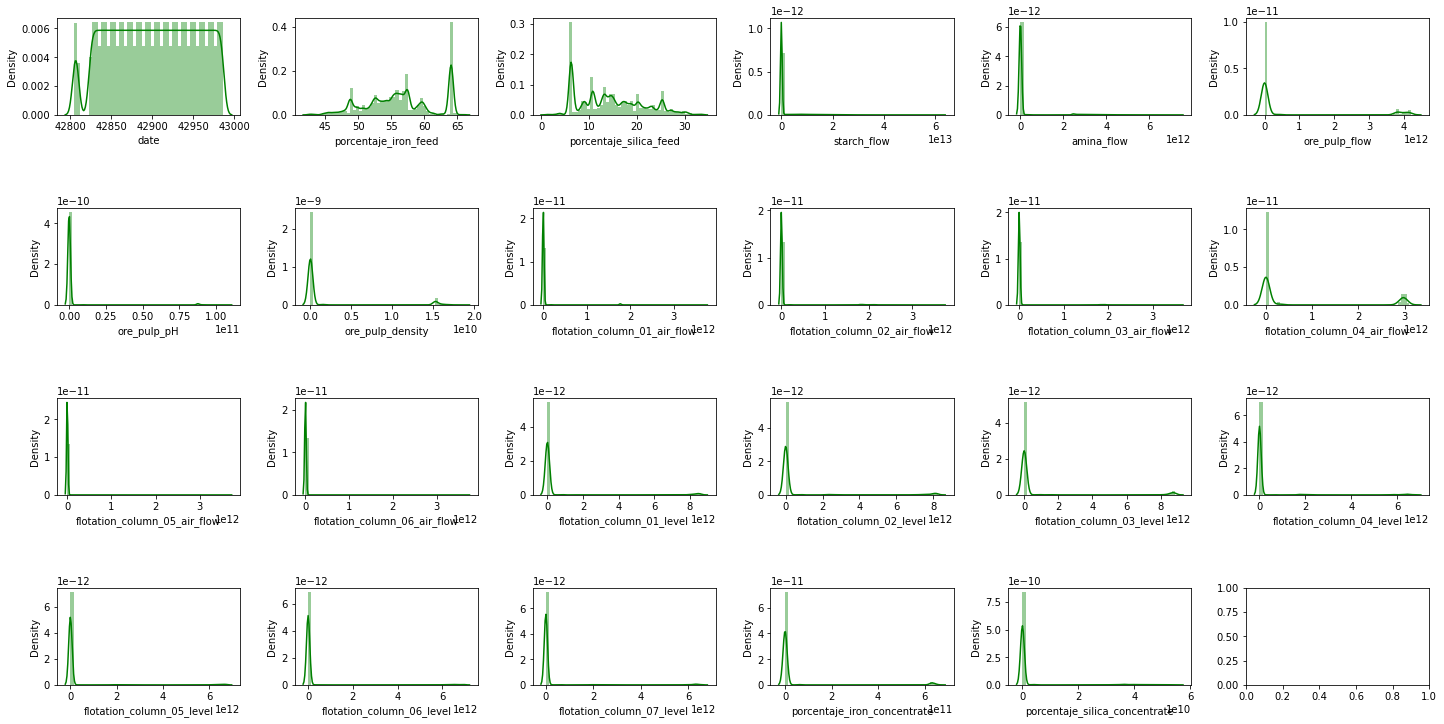

In [219]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_nuevo.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

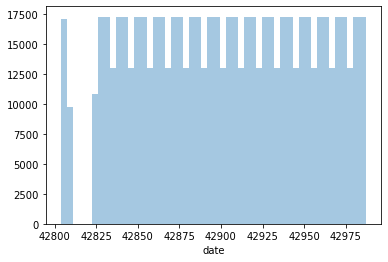

In [220]:
# Date
ax = sns.distplot(df_nuevo['date'], kde = False, norm_hist=False)

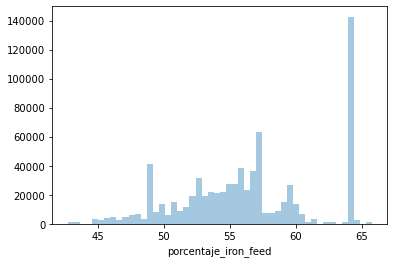

In [221]:
# Porcentaje Iron Feed
ax = sns.distplot(df_nuevo['porcentaje_iron_feed'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='porcentaje_iron_feed'>

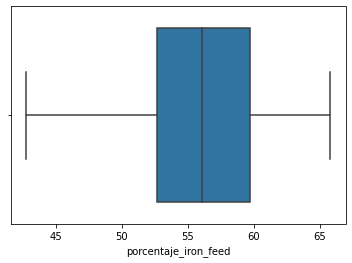

In [222]:
# Porcentahe Iron Feed
sns.boxplot(x=df_nuevo['porcentaje_iron_feed'])

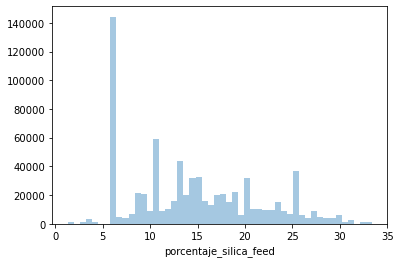

In [223]:
# Porcentaje Silica Feed
ax = sns.distplot(df_nuevo['porcentaje_silica_feed'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='porcentaje_silica_feed'>

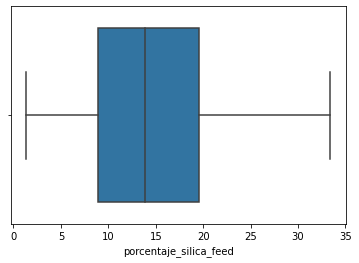

In [224]:
# Porcentahe Silica Feed
sns.boxplot(x=df_nuevo['porcentaje_silica_feed'])

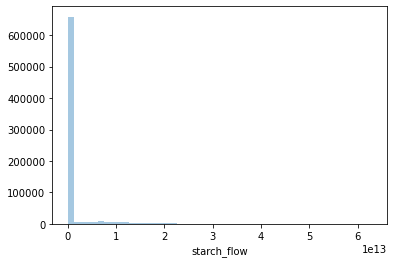

In [225]:
# Starch Flow
ax = sns.distplot(df_nuevo['starch_flow'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='starch_flow'>

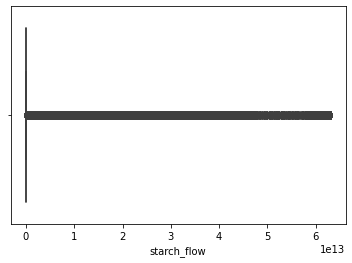

In [226]:
# Starch Flow
sns.boxplot(x=df_nuevo['starch_flow'])

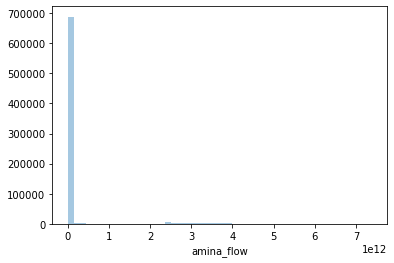

In [227]:
# Amina Flow
ax = sns.distplot(df_nuevo['amina_flow'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='amina_flow'>

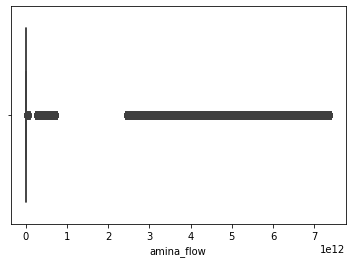

In [228]:
# Amina Flow
sns.boxplot(x=df_nuevo['amina_flow'])

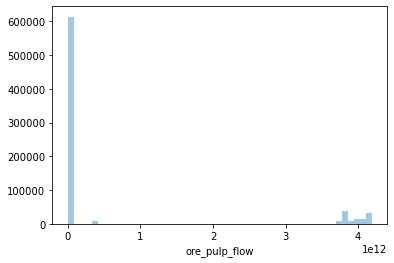

In [229]:
# Ore Pulp Flow
ax = sns.distplot(df_nuevo['ore_pulp_flow'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='ore_pulp_flow'>

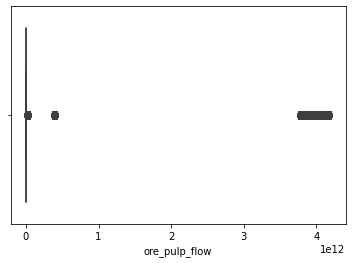

In [230]:
# Ore Pulp Flow
sns.boxplot(x=df_nuevo['ore_pulp_flow'])

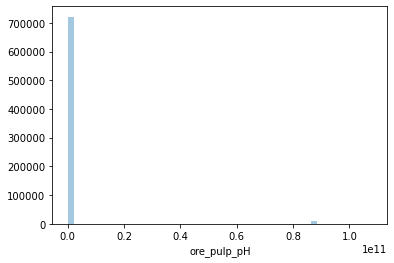

In [231]:
# Ore Pulp pH
ax = sns.distplot(df_nuevo['ore_pulp_pH'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='ore_pulp_pH'>

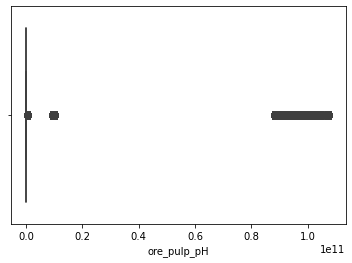

In [232]:
# Ore Pulp pH
sns.boxplot(x=df_nuevo['ore_pulp_pH'])

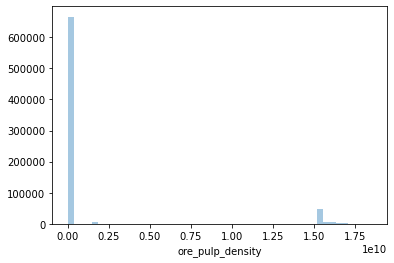

In [233]:
# Ore Pulp Density
ax = sns.distplot(df_nuevo['ore_pulp_density'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='ore_pulp_density'>

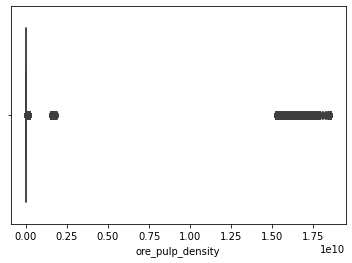

In [234]:
# Ore Pulp Density
sns.boxplot(x=df_nuevo['ore_pulp_density'])

<AxesSubplot:xlabel='flotation_column_06_air_flow'>

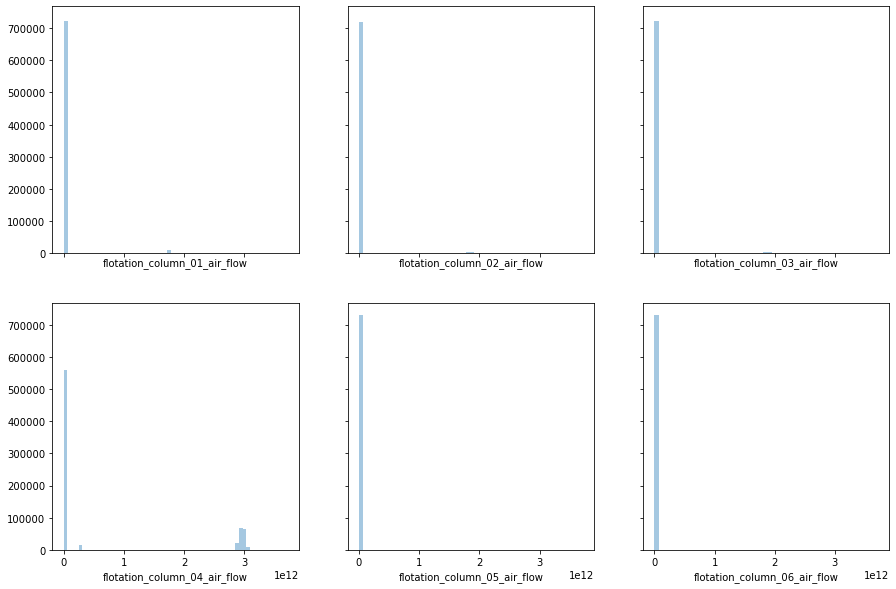

In [235]:
# Flotation Columns 01 - 06 Air Flow
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

sns.distplot(df_nuevo['flotation_column_01_air_flow'], kde = False, norm_hist=False, ax=axes[0, 0])
sns.distplot(df_nuevo['flotation_column_02_air_flow'], kde = False, norm_hist=False, ax=axes[0, 1])
sns.distplot(df_nuevo['flotation_column_03_air_flow'], kde = False, norm_hist=False, ax=axes[0, 2])
sns.distplot(df_nuevo['flotation_column_04_air_flow'], kde = False, norm_hist=False, ax=axes[1, 0])
sns.distplot(df_nuevo['flotation_column_05_air_flow'], kde = False, norm_hist=False, ax=axes[1, 1])
sns.distplot(df_nuevo['flotation_column_06_air_flow'], kde = False, norm_hist=False, ax=axes[1, 2])

<AxesSubplot:xlabel='flotation_column_06_air_flow'>

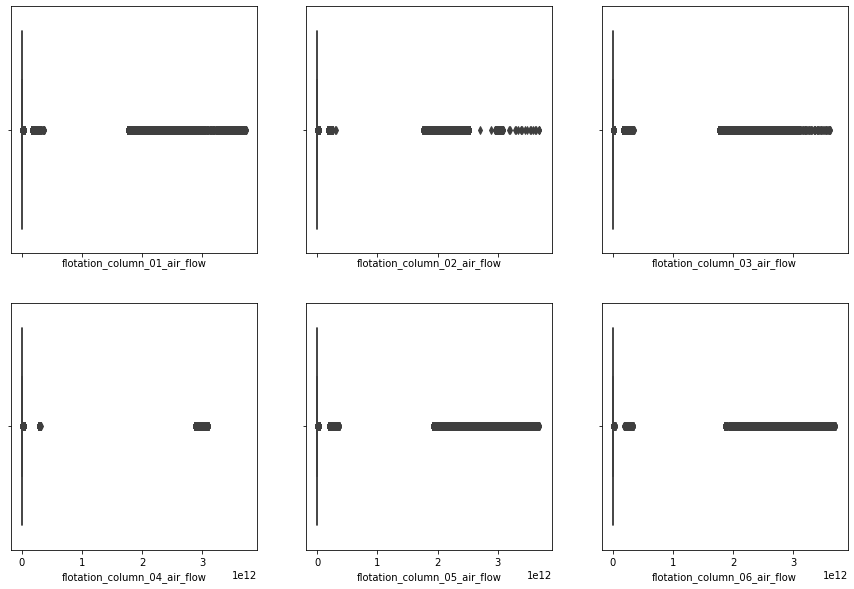

In [236]:
# Flotation Column 01 - 06 Air flow
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

sns.boxplot(x=df_nuevo['flotation_column_01_air_flow'], ax=axes[0, 0])
sns.boxplot(x=df_nuevo['flotation_column_02_air_flow'], ax=axes[0, 1])
sns.boxplot(x=df_nuevo['flotation_column_03_air_flow'], ax=axes[0, 2])
sns.boxplot(x=df_nuevo['flotation_column_04_air_flow'], ax=axes[1, 0])
sns.boxplot(x=df_nuevo['flotation_column_05_air_flow'], ax=axes[1, 1])
sns.boxplot(x=df_nuevo['flotation_column_06_air_flow'], ax=axes[1, 2])

<AxesSubplot:xlabel='flotation_column_07_level'>

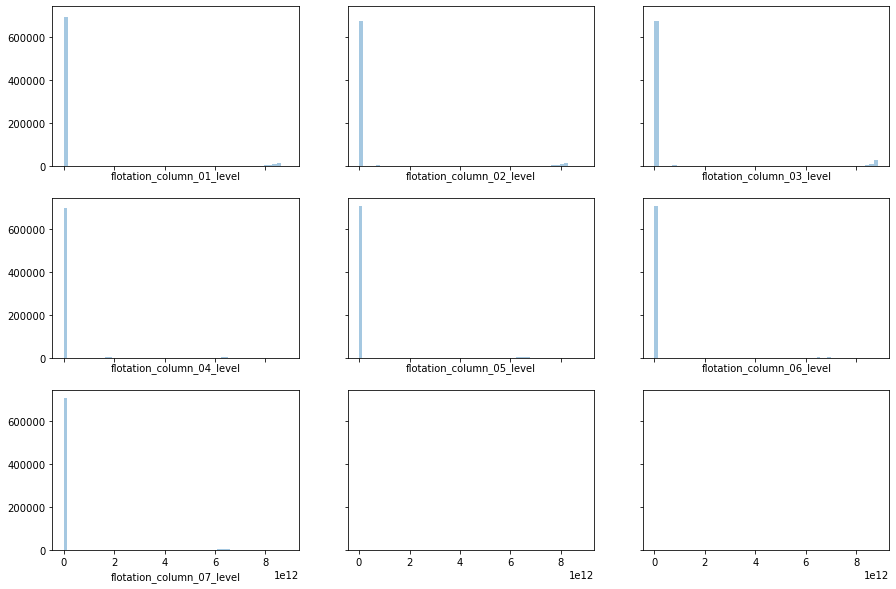

In [237]:
# Flotation Column 01 - 07 level
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)

sns.distplot(df_nuevo['flotation_column_01_level'], kde = False, norm_hist=False, ax=axes[0, 0])
sns.distplot(df_nuevo['flotation_column_02_level'], kde = False, norm_hist=False, ax=axes[0, 1])
sns.distplot(df_nuevo['flotation_column_03_level'], kde = False, norm_hist=False, ax=axes[0, 2])
sns.distplot(df_nuevo['flotation_column_04_level'], kde = False, norm_hist=False, ax=axes[1, 0])
sns.distplot(df_nuevo['flotation_column_05_level'], kde = False, norm_hist=False, ax=axes[1, 1])
sns.distplot(df_nuevo['flotation_column_06_level'], kde = False, norm_hist=False, ax=axes[1, 2])
sns.distplot(df_nuevo['flotation_column_07_level'], kde = False, norm_hist=False, ax=axes[2, 0])

<AxesSubplot:xlabel='flotation_column_06_level'>

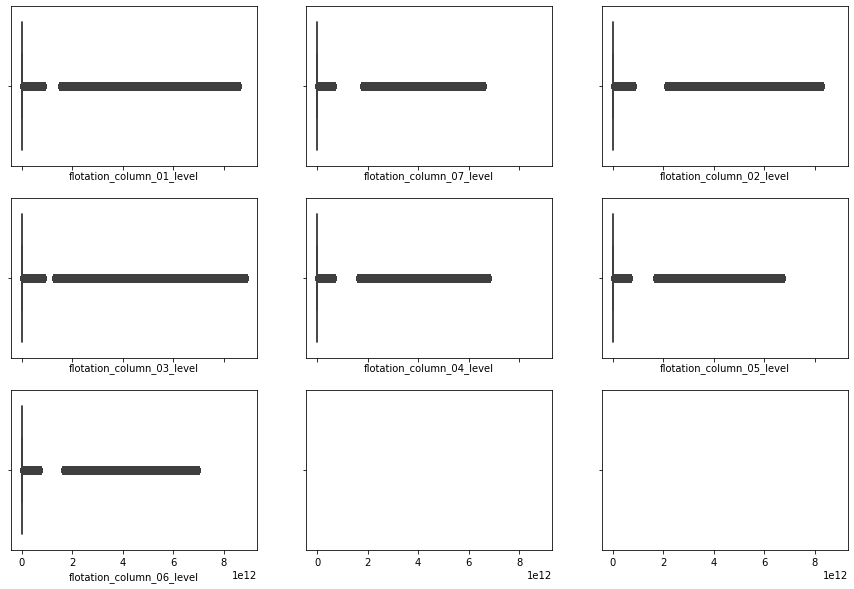

In [238]:
# Flotation Column 01 - 07 level
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)

sns.boxplot(x=df_nuevo['flotation_column_01_level'], ax=axes[0, 0])
sns.boxplot(x=df_nuevo['flotation_column_07_level'], ax=axes[0, 1])
sns.boxplot(x=df_nuevo['flotation_column_02_level'], ax=axes[0, 2])
sns.boxplot(x=df_nuevo['flotation_column_03_level'], ax=axes[1, 0])
sns.boxplot(x=df_nuevo['flotation_column_04_level'], ax=axes[1, 1])
sns.boxplot(x=df_nuevo['flotation_column_05_level'], ax=axes[1, 2])
sns.boxplot(x=df_nuevo['flotation_column_06_level'], ax=axes[2, 0])

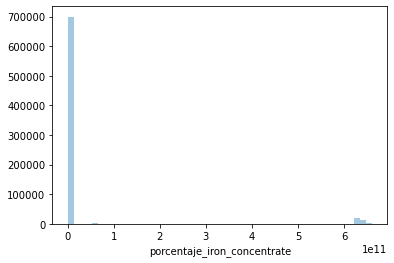

In [239]:
# Porcentaje Iron Concentrate
ax = sns.distplot(df_nuevo['porcentaje_iron_concentrate'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='porcentaje_iron_concentrate'>

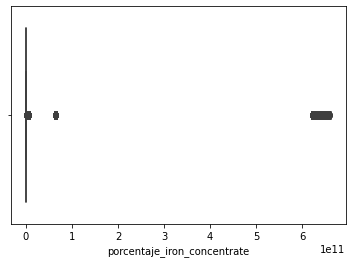

In [240]:
# Porcentaje Iron Concentrate
sns.boxplot(x=df_nuevo['porcentaje_iron_concentrate'])

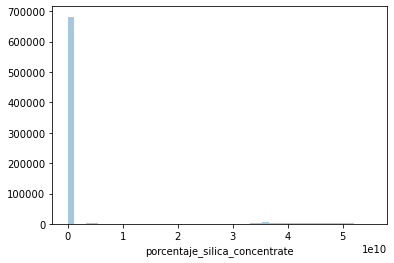

In [241]:
# Porcentaje Silica Concentrate
ax = sns.distplot(df_nuevo['porcentaje_silica_concentrate'], kde = False, norm_hist=False)

<AxesSubplot:xlabel='porcentaje_silica_concentrate'>

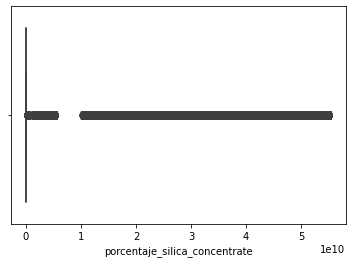

In [242]:
# Porcentaje Silica Concentrate
sns.boxplot(x=df_nuevo['porcentaje_silica_concentrate'])

#### Correlaciones

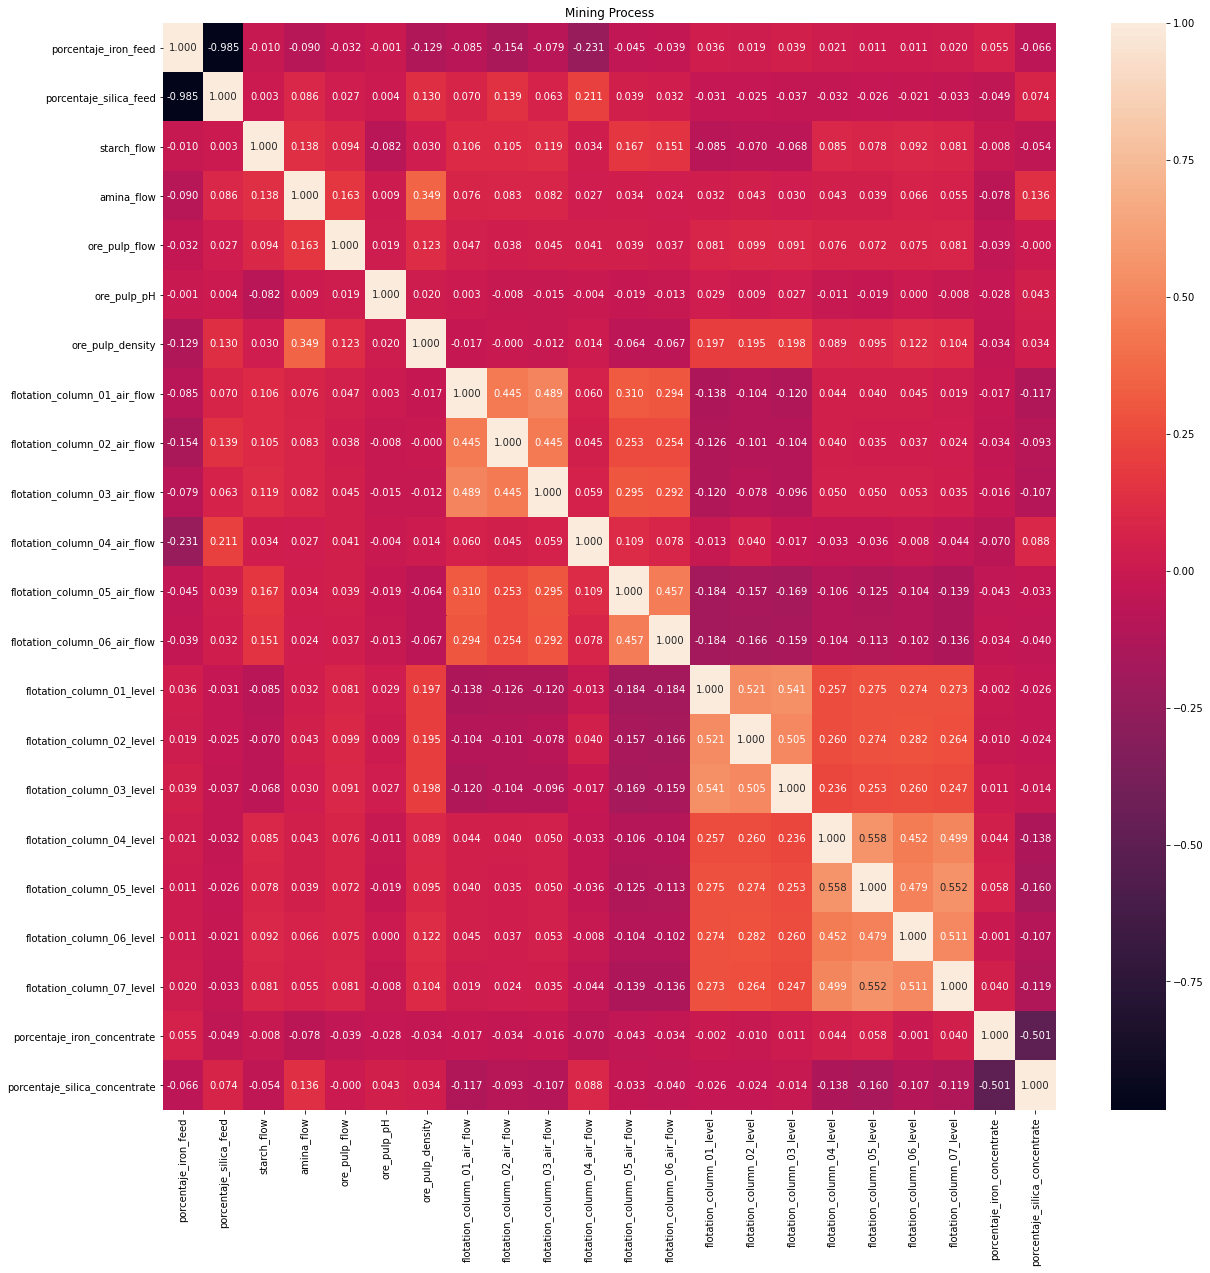

In [243]:
corr_mining = df_nuevo.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mining, annot = True, fmt=".3f").set_title("Mining Process")
plt.show()

## Machine Learning

### Estandarización de variables

In [244]:
df_2 = df_nuevo.drop(columns = ['date'])
df_2.head()

,porcentaje_iron_feed,porcentaje_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_pH,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,flotation_column_03_air_flow,...,flotation_column_06_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,porcentaje_iron_concentrate,porcentaje_silica_concentrate
0,55.2,16.98,3019.53,557434.0,395713.0,100664.0,1.74,249214.0,253235.0,250576.0,...,250884.0,457396.00,432962.00,424954.00,443558.00,502255.0,446.37,523344.0,66.91,1.31
1,55.2,16.98,3024.41,563965.0,397383.0,100672.0,1.74,249719.0,250532.0,250862.0,...,248994.0,451891.00,429.56,432939.00,448086.00,496363.0,445922.00,498075.0,66.91,1.31
2,55.2,16.98,3043.46,568054.0,399668.0,10068.0,1.74,249741.0,247874.0,250313.0,...,248071.0,451.24,468927.00,434.61,449688.00,484411.0,447826.00,458567.0,66.91,1.31
3,55.2,16.98,3047.36,568665.0,397939.0,100689.0,1.74,249917.0,254487.0,250049.0,...,251147.0,452441.00,458165.00,442865.00,446.21,471411.0,437.69,427669.0,66.91,1.31
4,55.2,16.98,3033.69,558167.0,400254.0,100697.0,1.74,250203.0,252136.0,249895.0,...,248928.0,452441.00,452.90,450523.00,453.67,462598.0,443682.00,425679.0,66.91,1.31


In [245]:
ss = PowerTransformer()
X_scaled = ss.fit_transform(df_2)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

       count  mean  std    min   25%   50%   75%   max
0   737453.0   0.0  1.0  -2.66 -0.70 -0.04  0.67  1.83
1   737453.0  -0.0  1.0  -3.11 -0.80  0.04  0.80  2.15
2   737453.0   0.0  1.0 -15.43 -0.51 -0.35 -0.20  2.20
3   737453.0   0.0  1.0  -2.80  0.02  0.07  0.10  2.59
4   737453.0   0.0  1.0  -2.32 -0.18 -0.17 -0.17  1.80
5   737453.0  -0.0  1.0  -8.08 -0.75  0.38  0.40  4.04
6   737453.0   0.0  1.0  -4.70 -0.11 -0.10 -0.10  2.44
7   737453.0  -0.0  1.0  -2.87  0.14  0.20  0.20  4.19
8   737453.0   0.0  1.0  -2.77  0.14  0.20  0.21  3.88
9   737453.0  -0.0  1.0  -2.65  0.16  0.22  0.22  4.05
10  737453.0   0.0  1.0  -1.58 -0.17 -0.16 -0.16  1.52
11  737453.0  -0.0  1.0  -2.87  0.16  0.23  0.24  5.95
12  737453.0  -0.0  1.0  -2.78  0.16  0.23  0.23  5.52
13  737453.0  -0.0  1.0  -3.08  0.02  0.07  0.12  2.60
14  737453.0   0.0  1.0  -2.77 -0.01  0.03  0.08  2.32
15  737453.0  -0.0  1.0  -3.00 -0.03  0.02  0.08  2.29
16  737453.0  -0.0  1.0  -2.91  0.05  0.10  0.15  2.79
17  737453

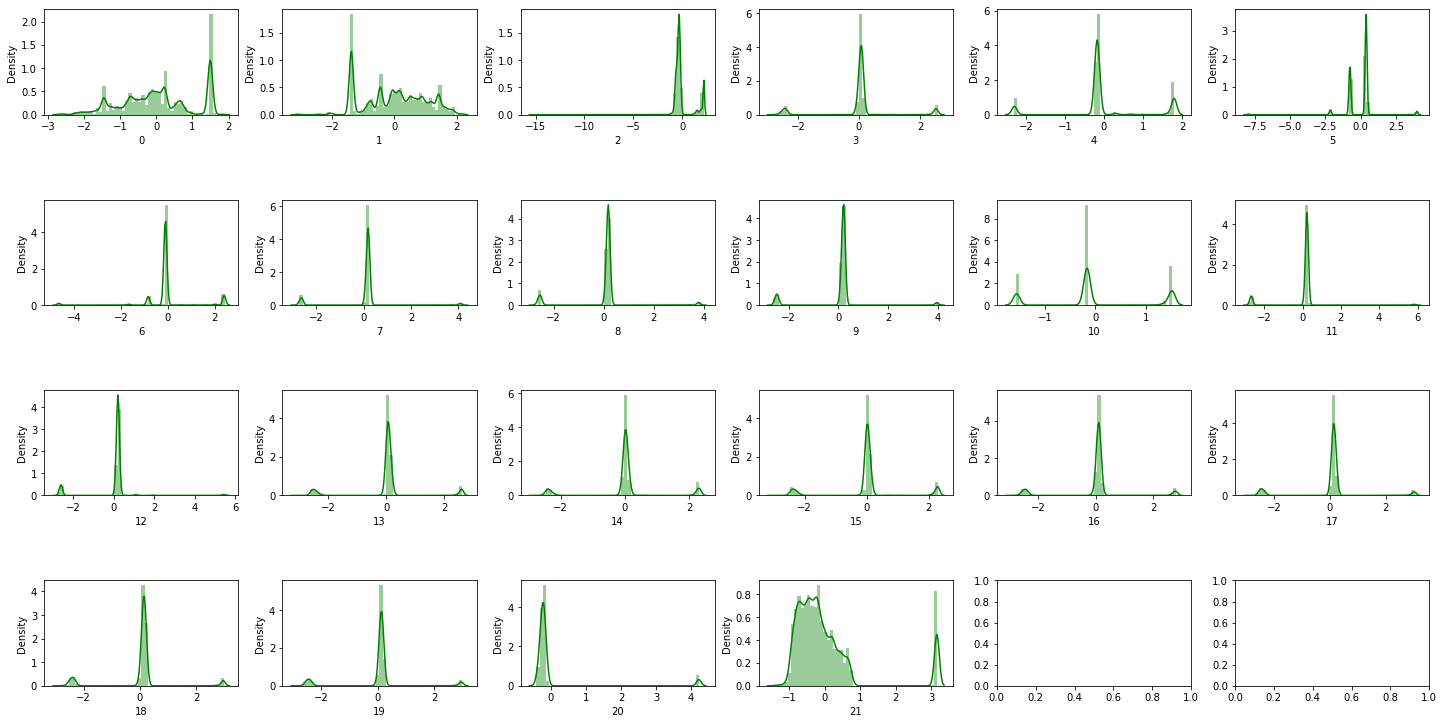

In [246]:
fig, ax = plt.subplots(ncols=6, nrows=4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

#### Correlación de datos estandarizados

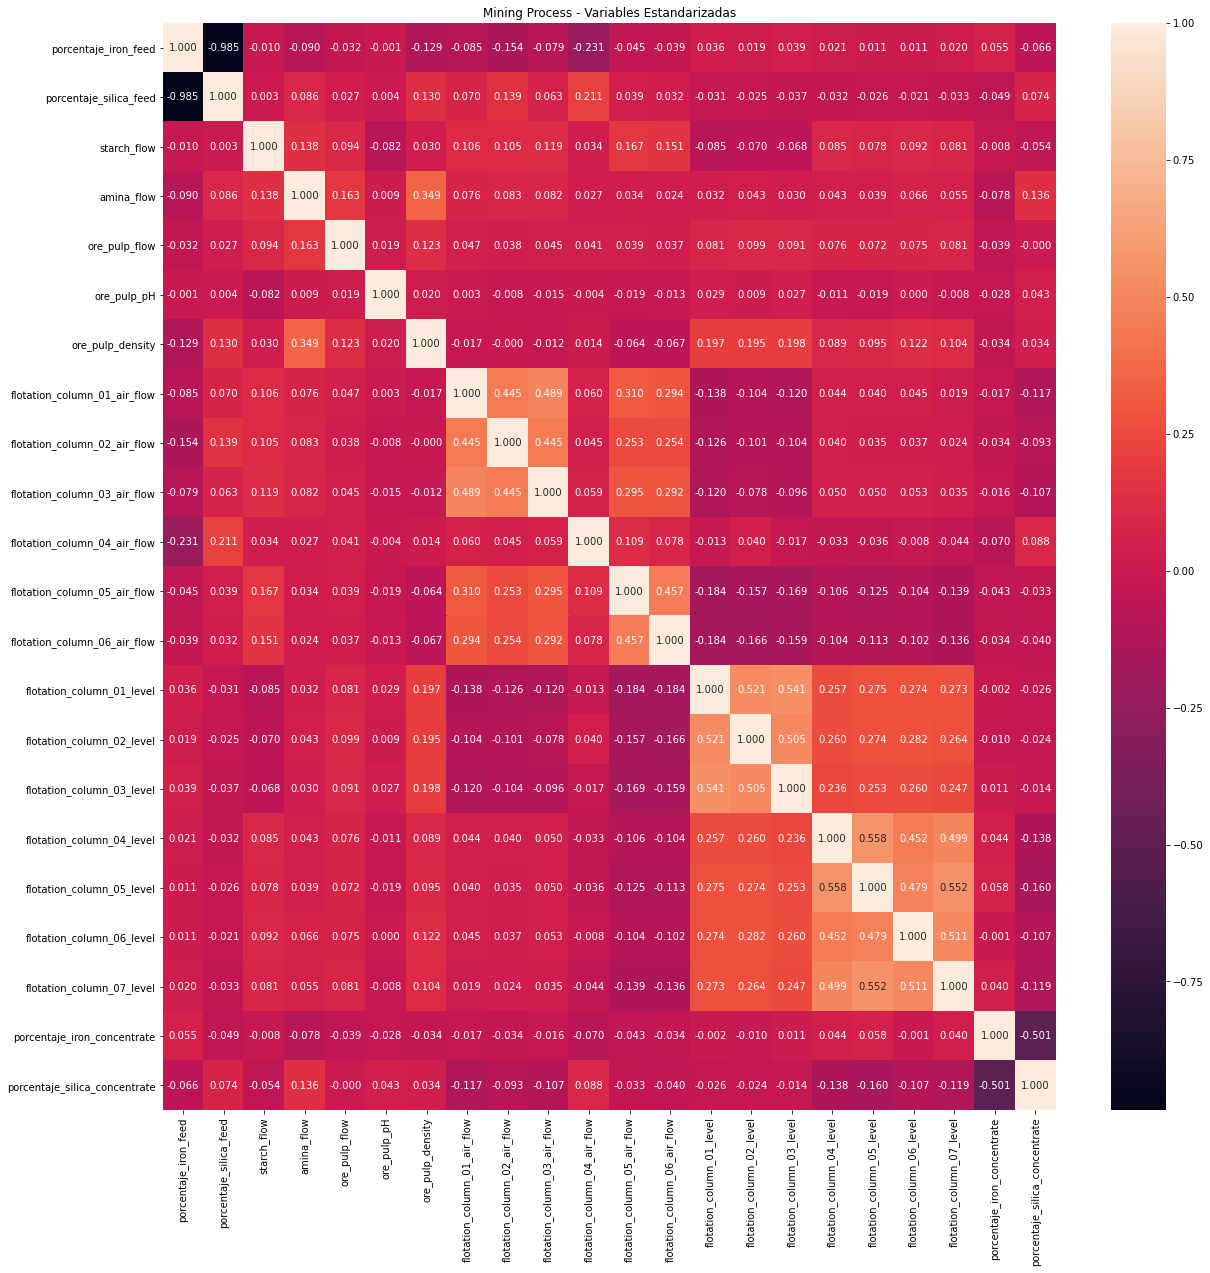

In [247]:
corr_mining_2 = df_2.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_mining_2, annot = True, fmt=".3f").set_title("Mining Process - Variables Estandarizadas")
plt.show()

#### Pairplot

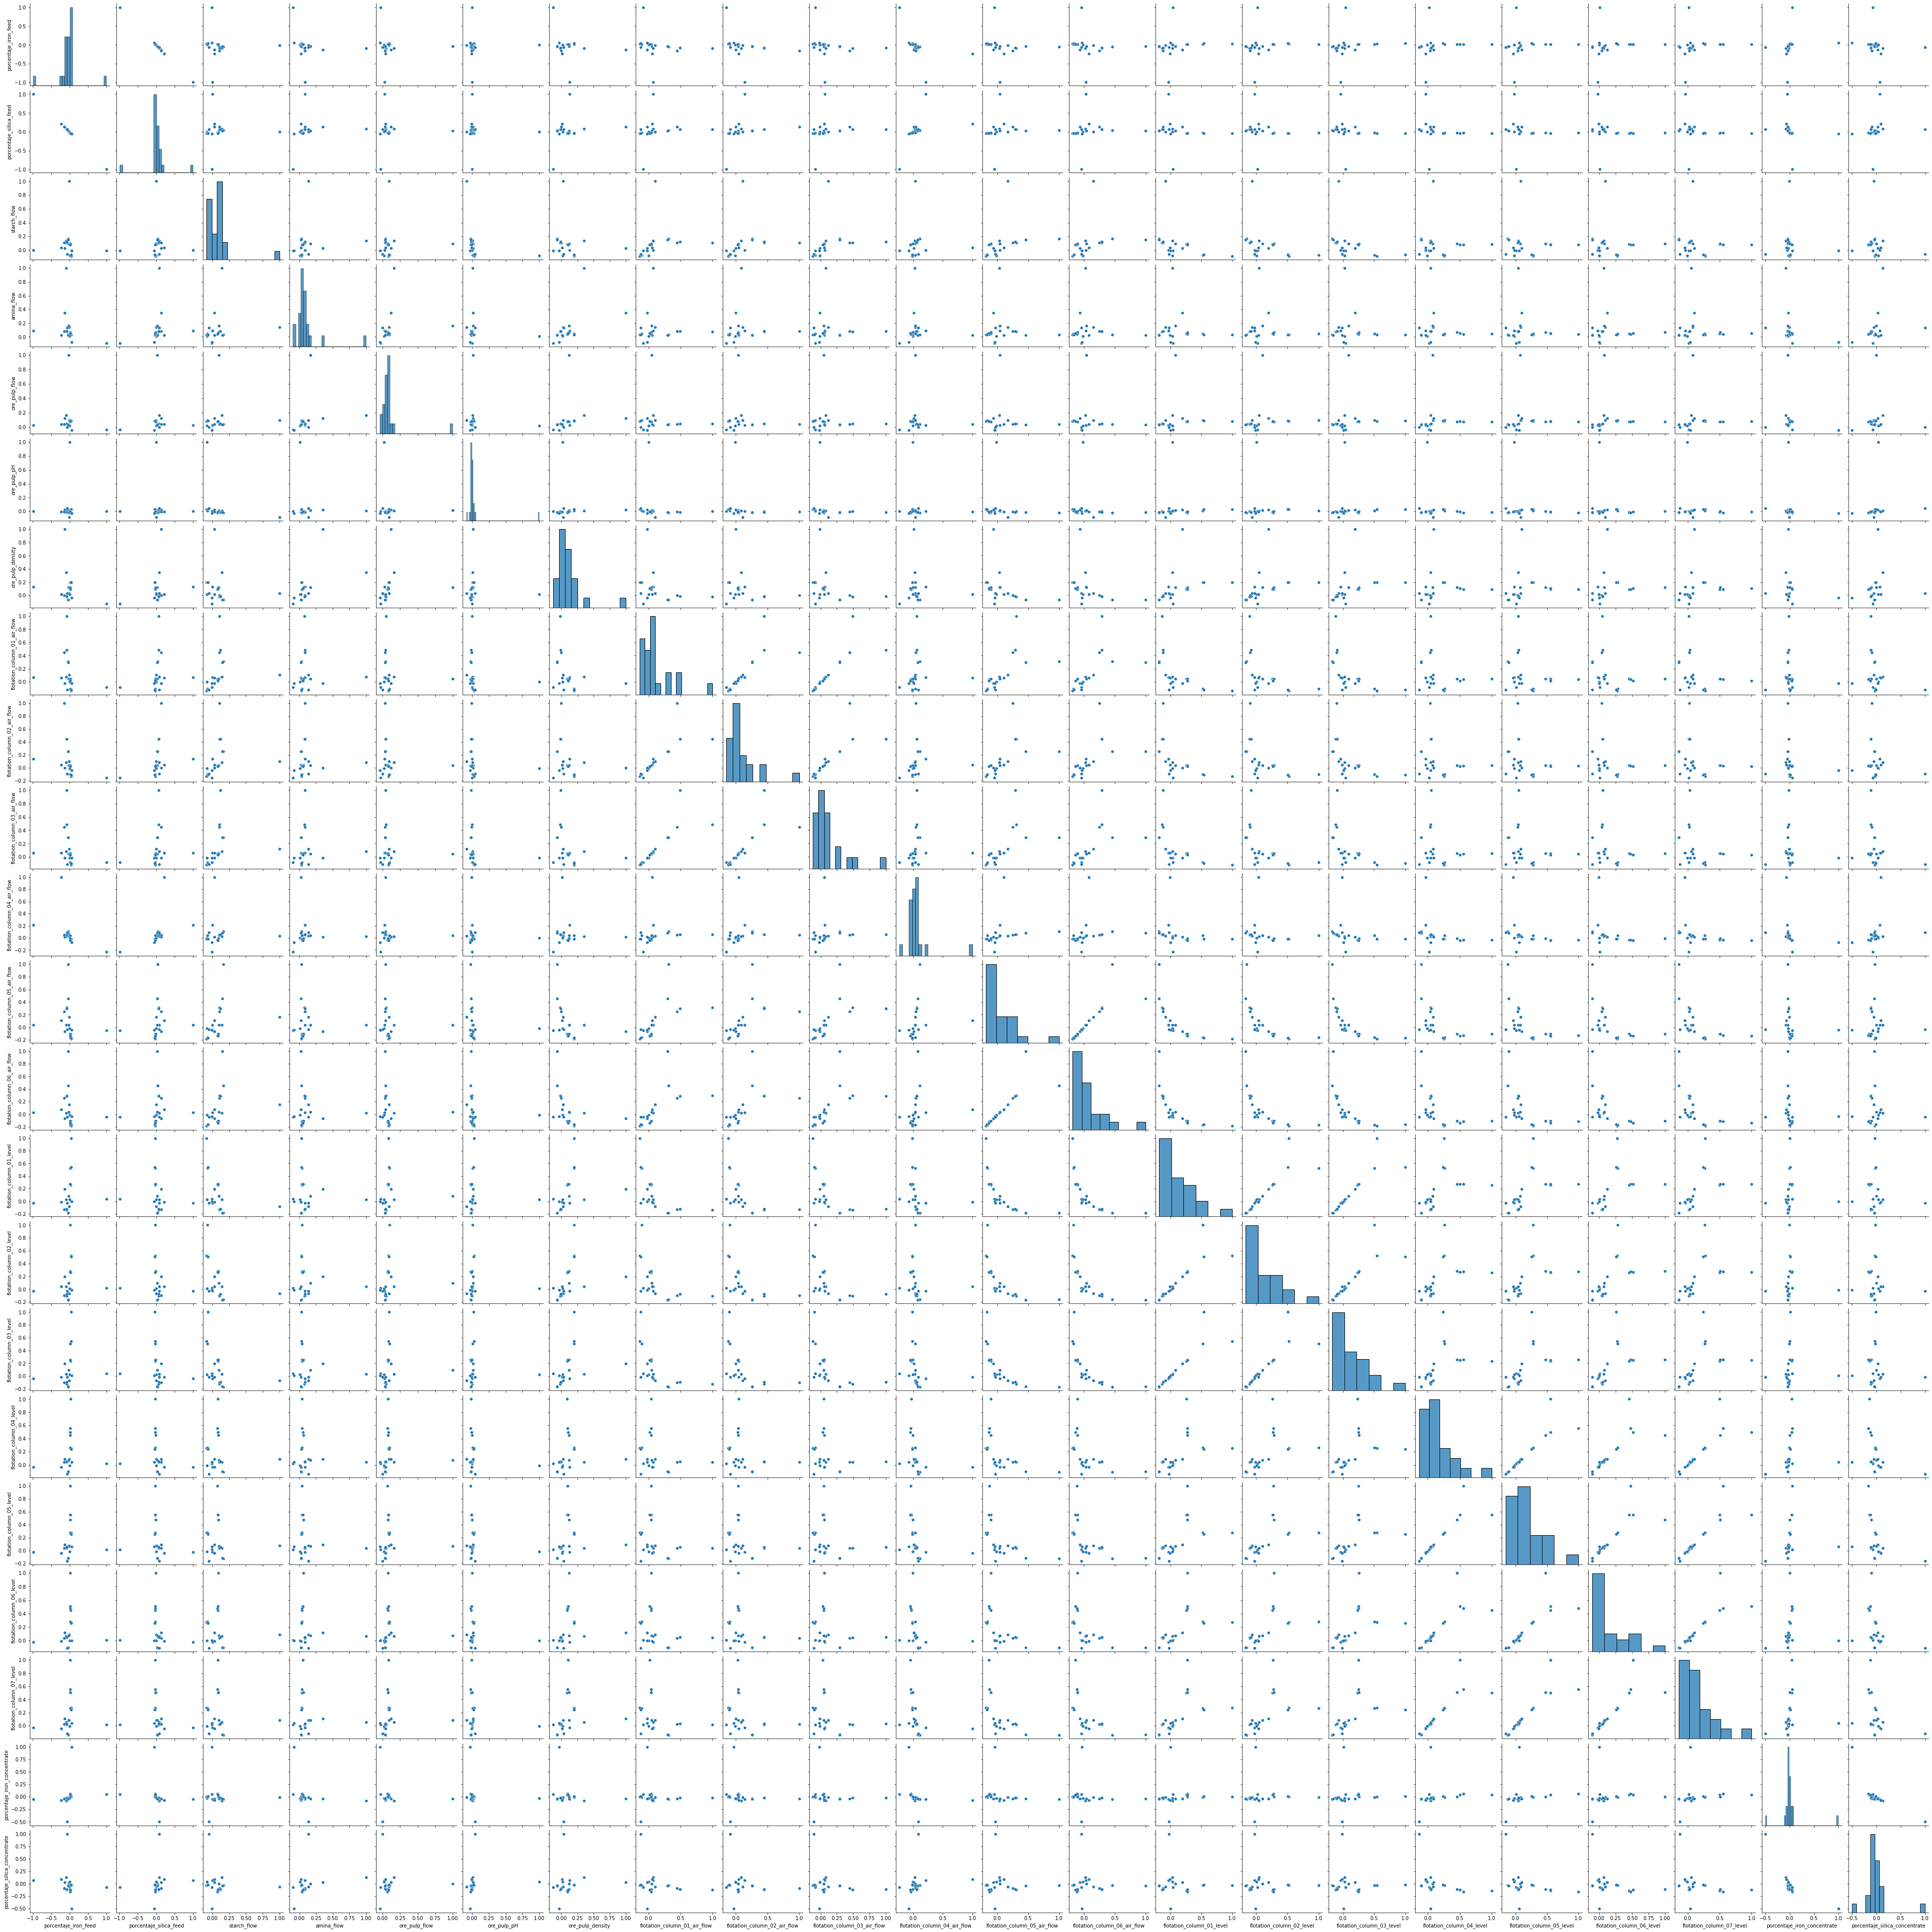

In [248]:
sns.pairplot(corr_mining_2);

#### Scatterplots de datos más correlacionados

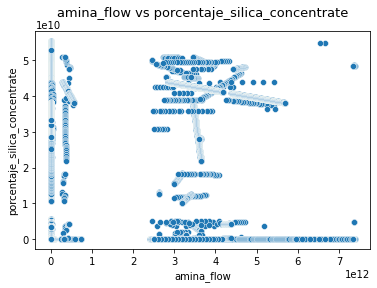

In [249]:
ax = sns.scatterplot(df_2['amina_flow'], df_2['porcentaje_silica_concentrate'])
ax.set_title('amina_flow vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

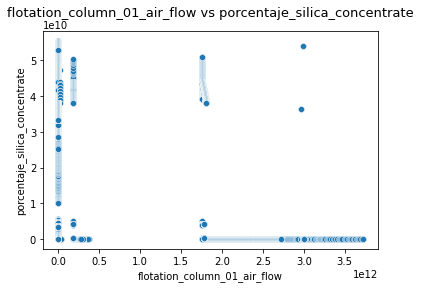

In [250]:
ax = sns.scatterplot(df_2['flotation_column_01_air_flow'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_01_air_flow vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

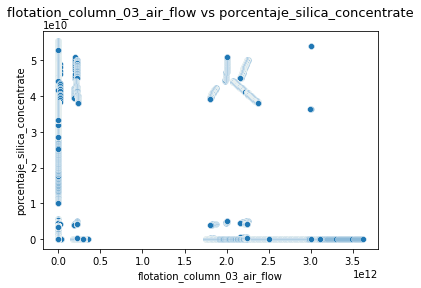

In [251]:
ax = sns.scatterplot(df_2['flotation_column_03_air_flow'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_03_air_flow vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

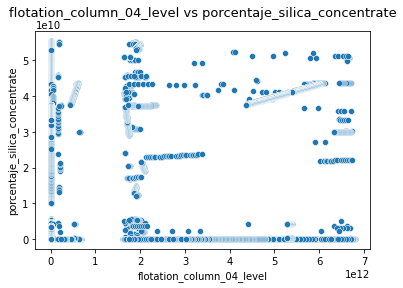

In [252]:
ax = sns.scatterplot(df_2['flotation_column_04_level'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_04_level vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

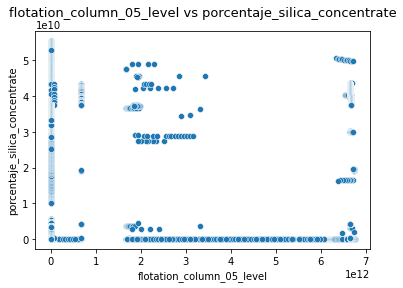

In [253]:
ax = sns.scatterplot(df_2['flotation_column_05_level'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_05_level vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

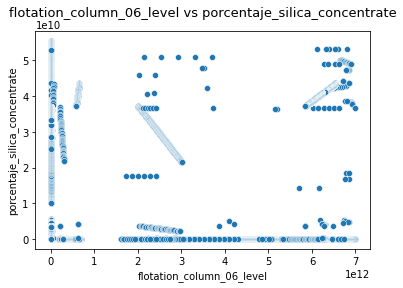

In [254]:
ax = sns.scatterplot(df_2['flotation_column_06_level'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_06_level vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

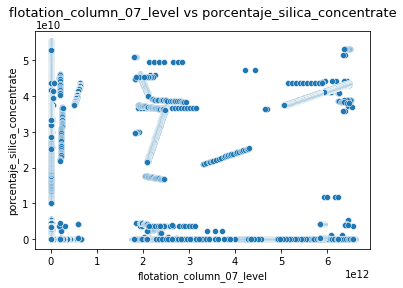

In [255]:
ax = sns.scatterplot(df_2['flotation_column_07_level'], df_2['porcentaje_silica_concentrate'])
ax.set_title('flotation_column_07_level vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

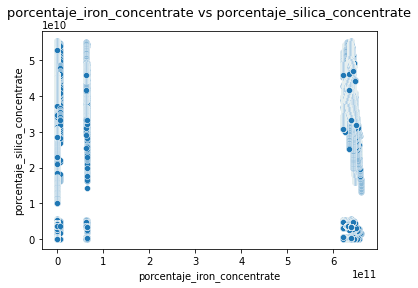

In [256]:
ax = sns.scatterplot(df_2['porcentaje_iron_concentrate'], df_2['porcentaje_silica_concentrate'])
ax.set_title('porcentaje_iron_concentrate vs porcentaje_silica_concentrate', fontsize=13, pad=15);
plt.show()

### Separación y evaluación

#### Todos los datos

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_2['porcentaje_silica_concentrate'], test_size = 0.4, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 442471
y_train shape: 442471
X_test shape:294982
y_test shape:294982


#### Datos más correlacionados

In [258]:
X_df_2 = df_2[['amina_flow', 'flotation_column_01_air_flow', 'flotation_column_03_air_flow', 'flotation_column_04_level',
         'flotation_column_05_level', 'flotation_column_06_level', 'flotation_column_07_level', 'porcentaje_iron_concentrate']]
Y_df_2 = df_2['porcentaje_silica_concentrate']

In [259]:
X_train_df_2, X_test_df_2, y_train_df_2, y_test_df_2 = train_test_split(X_df_2, Y_df_2, test_size = 0.4, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 442471
y_train shape: 442471
X_test shape:294982
y_test shape:294982


### Aprendizaje supervisados

#### Regresión

##### Lineal (con todos los datos)

In [260]:
# Algoritmo
lin_model = LinearRegression(normalize = True)
lin_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [261]:
# Evaluación del modelo
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =2.695229066363164e+19
Pruebas: MSE =2.683815683916006e+19


In [262]:
# Comparación del modelo vs datos observados
df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,3.34,3.697264e+09,-3.697264e+09
1,1.00,-4.230241e+09,4.230241e+09
2,2.08,4.308655e+08,-4.308655e+08
3,1.68,2.932210e+08,-2.932210e+08
4,2.30,1.192761e+09,-1.192761e+09
5,1.01,-4.312483e+09,4.312483e+09
6,1.10,-3.364828e+09,3.364828e+09
7,4.26,4.944361e+09,-4.944361e+09
8,4.12,5.334801e+09,-5.334801e+09
9,0.92,-4.936594e+09,4.936594e+09


In [263]:
df_predicciones.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,-3.714992e+09,3.714992e+09
294973,1.530000e+00,-1.679312e+09,1.679312e+09
294974,1.450000e+00,-2.271594e+09,2.271594e+09
294975,1.740000e+00,-6.146434e+07,6.146434e+07
294976,2.030000e+00,1.417540e+09,-1.417540e+09
294977,1.490000e+00,-1.826274e+09,1.826274e+09
294978,4.670000e+00,6.218221e+09,-6.218221e+09
294979,3.877795e+10,3.587803e+10,2.899921e+09
294980,1.310000e+00,-2.573018e+09,2.573018e+09
294981,1.850000e+00,2.537148e+08,-2.537148e+08


##### Lineal (con los datos más correlacionados)

In [264]:
# Algoritmo
lin_model = LinearRegression(normalize = True)
lin_model.fit(X_train_df_2, y_train_df_2)

LinearRegression(normalize=True)

In [265]:
# Evaluación del modelo
y_train_predict_df_2 = lin_model.predict(X_train_df_2)
MSE = mean_squared_error(y_train_df_2,y_train_predict_df_2)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict_df_2 = lin_model.predict(X_test_df_2)
MSE = (mean_squared_error(y_test_df_2, y_test_predict_df_2))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =5.429073210401464e+19
Pruebas: MSE =5.332331260275721e+19


In [266]:
# Comparación del modelo vs datos observados
df_predicciones_df_2 = pd.DataFrame({'valor_real':y_test_df_2, 'prediccion':y_test_predict_df_2, 'diferencia':y_test_df_2-y_test_predict_df_2})
df_predicciones_df_2 = df_predicciones_df_2.reset_index(drop = True)
df_predicciones_df_2.head(10)

,valor_real,prediccion,diferencia
0,3.34,1.035617e+09,-1.035617e+09
1,1.00,1.035617e+09,-1.035617e+09
2,2.08,1.035617e+09,-1.035617e+09
3,1.68,1.319166e+09,-1.319166e+09
4,2.30,1.035616e+09,-1.035616e+09
5,1.01,1.035617e+09,-1.035617e+09
6,1.10,1.035617e+09,-1.035617e+09
7,4.26,1.035617e+09,-1.035617e+09
8,4.12,1.035617e+09,-1.035617e+09
9,0.92,1.035617e+09,-1.035617e+09


In [267]:
df_predicciones_df_2.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,-9.542172e+08,9.542172e+08
294973,1.530000e+00,1.035617e+09,-1.035617e+09
294974,1.450000e+00,1.035617e+09,-1.035617e+09
294975,1.740000e+00,1.035617e+09,-1.035617e+09
294976,2.030000e+00,1.035617e+09,-1.035617e+09
294977,1.490000e+00,1.035617e+09,-1.035617e+09
294978,4.670000e+00,1.035617e+09,-1.035617e+09
294979,3.877795e+10,3.489988e+10,3.878071e+09
294980,1.310000e+00,1.035617e+09,-1.035617e+09
294981,1.850000e+00,1.035617e+09,-1.035617e+09


##### Polinomial (con todos los datos)

In [268]:
# Algoritmo
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)
    
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)
    
poly_model.fit(Xpolytrain, y_train)
y_train_predict = poly_model.predict(Xpolytrain)

In [269]:
# Evaluación del modelo
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =1.359648231879702e+19
Pruebas: MSE =1.3545576697806381e+19


In [270]:
# Comparación del modelo vs datos observados
df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion,diferencia
0,3.34,2.087171e+07,-2.087170e+07
1,1.00,7.026453e+08,-7.026453e+08
2,2.08,-1.244742e+08,1.244742e+08
3,1.68,-6.140421e+08,6.140421e+08
4,2.30,-2.945550e+08,2.945550e+08
5,1.01,1.284578e+09,-1.284578e+09
6,1.10,1.000231e+09,-1.000231e+09
7,4.26,1.091727e+09,-1.091727e+09
8,4.12,1.045812e+09,-1.045812e+09
9,0.92,1.335229e+09,-1.335229e+09


In [271]:
df_predicciones.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,1.305665e+09,-1.305665e+09
294973,1.530000e+00,-2.454203e+08,2.454203e+08
294974,1.450000e+00,-2.033205e+08,2.033205e+08
294975,1.740000e+00,-1.139930e+09,1.139930e+09
294976,2.030000e+00,-9.082002e+08,9.082002e+08
294977,1.490000e+00,4.736565e+08,-4.736565e+08
294978,4.670000e+00,2.746703e+09,-2.746703e+09
294979,3.877795e+10,3.508870e+10,3.689242e+09
294980,1.310000e+00,2.795050e+08,-2.795050e+08
294981,1.850000e+00,-2.036224e+08,2.036224e+08


##### Polinomial (con los datos más correlacionados)

In [272]:
# Algoritmo
poly_model_df_2 = LinearRegression()
poly_df_2 = PolynomialFeatures(degree=2)
    
Xpolytrain_df_2 = poly_df_2.fit_transform(X_train_df_2)
Xpolytest_df_2 = poly_df_2.fit_transform(X_test_df_2)
    
poly_model_df_2.fit(Xpolytrain_df_2, y_train_df_2)
y_train_predict_df_2 = poly_model_df_2.predict(Xpolytrain_df_2)

In [273]:
# Evaluación del modelo
MSE = mean_squared_error(y_train_df_2,y_train_predict_df_2)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict_df_2 = poly_model_df_2.predict(Xpolytest_df_2)
MSE = (mean_squared_error(y_test_df_2, y_test_predict_df_2))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =8.37077737469533e+19
Pruebas: MSE =8.275853203858465e+19


In [274]:
# Comparación del modelo vs datos observados
df_predicciones_df_2 = pd.DataFrame({'valor_real':y_test_df_2, 'prediccion':y_test_predict_df_2, 'diferencia':y_test_df_2-y_test_predict_df_2})
df_predicciones_df_2 = df_predicciones_df_2.reset_index(drop = True)
df_predicciones_df_2.head(10)

,valor_real,prediccion,diferencia
0,3.34,1.122148e+09,-1.122148e+09
1,1.00,1.122147e+09,-1.122147e+09
2,2.08,1.122147e+09,-1.122147e+09
3,1.68,1.112788e+08,-1.112788e+08
4,2.30,1.122147e+09,-1.122147e+09
5,1.01,1.122147e+09,-1.122147e+09
6,1.10,1.122148e+09,-1.122148e+09
7,4.26,1.122147e+09,-1.122147e+09
8,4.12,1.122147e+09,-1.122147e+09
9,0.92,1.122148e+09,-1.122148e+09


In [275]:
df_predicciones_df_2.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,-4.018527e+09,4.018527e+09
294973,1.530000e+00,1.122147e+09,-1.122147e+09
294974,1.450000e+00,1.122147e+09,-1.122147e+09
294975,1.740000e+00,1.122147e+09,-1.122147e+09
294976,2.030000e+00,1.122148e+09,-1.122148e+09
294977,1.490000e+00,1.122146e+09,-1.122146e+09
294978,4.670000e+00,1.122148e+09,-1.122148e+09
294979,3.877795e+10,2.971744e+10,9.060504e+09
294980,1.310000e+00,1.122146e+09,-1.122146e+09
294981,1.850000e+00,1.122147e+09,-1.122147e+09


#### Árbol de decisión regresión

##### Con todos los datos

In [276]:
# Algoritmo
adr = DecisionTreeRegressor(max_depth = 5)
adr.fit(X_train, y_train)
y_predict_adr = adr.predict(X_test)
print(y_predict_adr)

[2.78000327e+03 2.78000327e+03 2.78000327e+03 ... 3.80901842e+10
 2.78000327e+03 2.78000327e+03]


In [277]:
# Evaluación del modelo
print('Precisión del modelo de entrenamiento: ', adr.score(X_train, y_train))
print('Precisión del modelo de prueba: ', adr.score(X_test, y_test))

Precisión del modelo de entrenamiento:  0.9997852290438421
Precisión del modelo de prueba:  0.9997801911363925


In [278]:
# Comparación del modelo vs datos observados
df_predicciones_arbol = pd.DataFrame({'valor_real':y_test, 'prediccion':y_predict_adr, 'diferencia':y_test-y_predict_adr})
df_predicciones_arbol = df_predicciones_arbol.reset_index(drop = True)
df_predicciones_arbol.head(10)

,valor_real,prediccion,diferencia
0,3.34,2780.00327,-2776.66327
1,1.00,2780.00327,-2779.00327
2,2.08,2780.00327,-2777.92327
3,1.68,2780.00327,-2778.32327
4,2.30,2780.00327,-2777.70327
5,1.01,2780.00327,-2778.99327
6,1.10,2780.00327,-2778.90327
7,4.26,2780.00327,-2775.74327
8,4.12,2780.00327,-2775.88327
9,0.92,2780.00327,-2779.08327


In [279]:
df_predicciones_arbol.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,2.780003e+03,-2.778943e+03
294973,1.530000e+00,2.780003e+03,-2.778473e+03
294974,1.450000e+00,2.780003e+03,-2.778553e+03
294975,1.740000e+00,2.780003e+03,-2.778263e+03
294976,2.030000e+00,2.780003e+03,-2.777973e+03
294977,1.490000e+00,2.780003e+03,-2.778513e+03
294978,4.670000e+00,2.780003e+03,-2.775333e+03
294979,3.877795e+10,3.809018e+10,6.877631e+08
294980,1.310000e+00,2.780003e+03,-2.778693e+03
294981,1.850000e+00,2.780003e+03,-2.778153e+03


##### Con los datos más correlacionados

In [280]:
# Algoritmo
adr_df_2 = DecisionTreeRegressor(max_depth = 5)
adr_df_2.fit(X_train_df_2, y_train_df_2)
y_predict_df_2 = adr_df_2.predict(X_test_df_2)
print(y_predict_df_2)

[1.91447469e+00 1.91447469e+00 1.91447469e+00 ... 3.72465515e+10
 1.91447469e+00 1.91447469e+00]


In [281]:
# Evaluación del modelo
print('Precisión del modelo de entrenamiento: ', adr_df_2.score(X_train_df_2, y_train_df_2))
print('Precisión del modelo de prueba: ', adr_df_2.score(X_test_df_2, y_test_df_2))

Precisión del modelo de entrenamiento:  0.7144937836466458
Precisión del modelo de prueba:  0.7121189722176661


#### Bosque aleatorio regresión

##### Con todos los datos

In [282]:
# Algoritmo
bar = RandomForestRegressor(n_estimators = 300, max_depth = 8)
bar.fit(X_train, y_train)
y_predict = bar.predict(X_test)
print(y_predict)

[2.19910565e+00 2.18540781e+00 2.18540781e+00 ... 3.87444376e+10
 2.18540781e+00 2.18540781e+00]


In [283]:
# Evaluación del modelo
print('Precisión del modelo de entrenamiento: ', bar.score(X_train, y_train))
print('Precisión del modelo de prueba: ', bar.score(X_test, y_test))

Precisión del modelo de entrenamiento:  0.9999950599159596
Precisión del modelo de prueba:  0.9999949046646498


In [285]:
# Comparación del modelo vs datos observados
df_predicciones_bosque = pd.DataFrame({'valor_real':y_test, 'prediccion':y_predict, 'diferencia':y_test-y_predict})
df_predicciones_bosque = df_predicciones_bosque.reset_index(drop = True)
df_predicciones_bosque.head(10)

,valor_real,prediccion,diferencia
0,3.34,2.199106,1.140894
1,1.00,2.185408,-1.185408
2,2.08,2.185408,-0.105408
3,1.68,2.185408,-0.505408
4,2.30,2.185408,0.114592
5,1.01,2.185408,-1.175408
6,1.10,2.185408,-1.085408
7,4.26,2.199106,2.060894
8,4.12,2.199106,1.920894
9,0.92,2.185408,-1.265408


In [286]:
df_predicciones_bosque.tail(10)

,valor_real,prediccion,diferencia
294972,1.060000e+00,2.185408e+00,-1.125408e+00
294973,1.530000e+00,2.185408e+00,-6.554078e-01
294974,1.450000e+00,2.185408e+00,-7.354078e-01
294975,1.740000e+00,2.185408e+00,-4.454078e-01
294976,2.030000e+00,2.185408e+00,-1.554078e-01
294977,1.490000e+00,2.185408e+00,-6.954078e-01
294978,4.670000e+00,2.199106e+00,2.470894e+00
294979,3.877795e+10,3.874444e+10,3.350965e+07
294980,1.310000e+00,2.185408e+00,-8.754078e-01
294981,1.850000e+00,2.185408e+00,-3.354078e-01


##### Con los datos más correlacionados

In [287]:
# Algoritmo
bar_df_2 = RandomForestRegressor(n_estimators = 300, max_depth = 8)
bar_df_2.fit(X_train_df_2, y_train_df_2)
y_predict_df_2 = bar_df_2.predict(X_test_df_2)
print(y_predict_df_2)

[2.55853889e+00 1.91156931e+00 1.91156931e+00 ... 3.68737992e+10
 1.43372913e+00 1.91156931e+00]


In [288]:
# Evaluación del modelo
print('Precisión del modelo de entrenamiento: ', bar_df_2.score(X_train_df_2, y_train_df_2))
print('Precisión del modelo de prueba: ', bar_df_2.score(X_test_df_2, y_test_df_2))

Precisión del modelo de entrenamiento:  0.7754381533561048
Precisión del modelo de prueba:  0.768637779618044
